In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
df = pd.read_excel('Pistachio_28_Features_Dataset.xlsx')

In [49]:
df

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,...,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB,Class
0,63391,1568.4050,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,...,17.7206,19.6024,21.1342,0.4581,0.6635,0.7591,2.9692,3.0576,2.9542,Kirmizi_Pistachio
1,68358,1942.1870,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,...,26.7061,27.2112,25.1035,-0.3847,-0.2713,-0.2927,1.9807,2.1006,2.2152,Kirmizi_Pistachio
2,73589,1246.5380,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,...,19.0129,20.0703,20.7006,-0.6014,-0.4500,0.2998,3.5420,3.6856,4.1012,Kirmizi_Pistachio
3,71106,1445.2610,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,...,18.1773,18.7152,29.7883,-0.6943,-0.6278,-0.7798,2.8776,2.8748,2.8953,Kirmizi_Pistachio
4,80087,1251.5240,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,...,23.4298,24.0878,23.1157,-0.9287,-0.8134,-0.4970,2.9915,2.8813,2.7362,Kirmizi_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,85983,1157.1160,444.3447,248.8627,0.8284,330.8730,0.9823,87536,0.6799,1.7855,...,20.8474,20.8118,21.1175,-0.6994,-0.7071,-0.6963,2.8853,2.6599,2.6317,Siirt_Pistachio
2144,85691,2327.3459,439.8794,278.9297,0.7732,330.3107,0.8886,96439,0.6590,1.5770,...,21.2621,22.5004,21.5821,-0.5567,-0.4968,-0.6597,2.3022,2.2664,2.5161,Siirt_Pistachio
2145,101136,1255.6190,475.2161,271.3299,0.8210,358.8459,0.9888,102286,0.7584,1.7514,...,21.1262,20.0279,17.4401,-0.9072,-0.8790,-0.4470,3.3112,3.4306,3.0697,Siirt_Pistachio
2146,97409,1195.2150,452.1823,274.5764,0.7945,352.1718,0.9902,98376,0.7635,1.6468,...,19.3274,19.1782,19.8930,-0.9473,-0.8404,-0.3153,3.4237,2.9606,3.0033,Siirt_Pistachio


In [50]:
x = df.drop(['Class'],axis=1)

In [51]:
y = df['Class']

In [52]:
x.head()

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,...,Mean_RB,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,...,165.3167,17.7206,19.6024,21.1342,0.4581,0.6635,0.7591,2.9692,3.0576,2.9542
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,...,187.3744,26.7061,27.2112,25.1035,-0.3847,-0.2713,-0.2927,1.9807,2.1006,2.2152
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,...,187.7118,19.0129,20.0703,20.7006,-0.6014,-0.4500,0.2998,3.5420,3.6856,4.1012
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,...,187.9537,18.1773,18.7152,29.7883,-0.6943,-0.6278,-0.7798,2.8776,2.8748,2.8953
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,...,194.4906,23.4298,24.0878,23.1157,-0.9287,-0.8134,-0.4970,2.9915,2.8813,2.7362


In [53]:
y

0       Kirmizi_Pistachio
1       Kirmizi_Pistachio
2       Kirmizi_Pistachio
3       Kirmizi_Pistachio
4       Kirmizi_Pistachio
              ...        
2143      Siirt_Pistachio
2144      Siirt_Pistachio
2145      Siirt_Pistachio
2146      Siirt_Pistachio
2147      Siirt_Pistachio
Name: Class, Length: 2148, dtype: object

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           2148 non-null   int64  
 1   Perimeter      2148 non-null   float64
 2   Major_Axis     2148 non-null   float64
 3   Minor_Axis     2148 non-null   float64
 4   Eccentricity   2148 non-null   float64
 5   Eqdiasq        2148 non-null   float64
 6   Solidity       2148 non-null   float64
 7   Convex_Area    2148 non-null   int64  
 8   Extent         2148 non-null   float64
 9   Aspect_Ratio   2148 non-null   float64
 10  Roundness      2148 non-null   float64
 11  Compactness    2148 non-null   float64
 12  Shapefactor_1  2148 non-null   float64
 13  Shapefactor_2  2148 non-null   float64
 14  Shapefactor_3  2148 non-null   float64
 15  Shapefactor_4  2148 non-null   float64
 16  Mean_RR        2148 non-null   float64
 17  Mean_RG        2148 non-null   float64
 18  Mean_RB 

In [55]:
df.groupby('Class').size()

Class
Kirmizi_Pistachio    1232
Siirt_Pistachio       916
dtype: int64

(array([1232.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         916.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

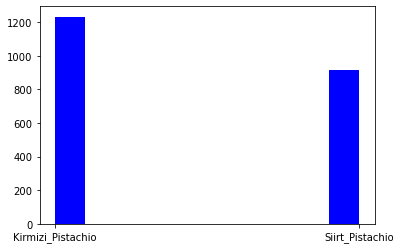

In [56]:
plt.hist(df['Class'], color = 'blue')

In [57]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(x)

In [58]:
X

array([[-1.26229557,  0.3793384 , -1.72358958, ..., -0.11555997,
         0.23737327,  0.01817042],
       [-0.88367525,  1.3748213 , -1.09099947, ..., -1.46261734,
        -1.23215144, -0.96716768],
       [-0.48493096, -0.47788077,  0.18848508, ...,  0.66501106,
         1.20170087,  1.54751115],
       ...,
       [ 1.61489872, -0.45369561,  0.89300681, ...,  0.35049326,
         0.81013473,  0.17217116],
       [ 1.33080009, -0.61456785,  0.18291441, ...,  0.50380025,
         0.08842458,  0.0836374 ],
       [-0.11317108,  2.47933587, -0.01035424, ..., -0.71706844,
        -1.04143569, -0.65676618]])

In [59]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 5)

In [69]:
knn = KNeighborsClassifier(n_neighbors=51)

In [70]:
# learning
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=51)

In [71]:
y_predict = knn.predict(X_test)

In [72]:
np.mean(y_predict == y_test)

0.8046511627906977

In [73]:
print(confusion_matrix(y_test, y_predict))

[[220  32]
 [ 52 126]]


In [74]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       252
           1       0.80      0.71      0.75       178

    accuracy                           0.80       430
   macro avg       0.80      0.79      0.79       430
weighted avg       0.80      0.80      0.80       430



In [75]:
accuracy= accuracy_score(y_test, y_predict)
accuracy

0.8046511627906977